In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial import distance
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import pdist
from scipy.spatial import distance

# import n-by-2 matrix as csv file

In [2]:
data = pd.read_csv("matrixnby2.csv")

In [3]:
matrix = np.array(data)

# Kmeans to identify clusters and plot 

In [4]:
#kmeans to identify clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(matrix)
y_kmeans = kmeans.predict(matrix)

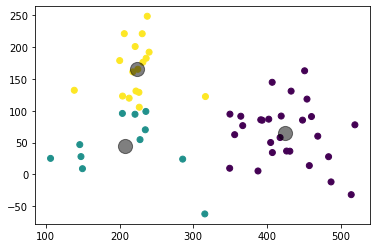

In [5]:
#plot clusters and cluster centers
plt.scatter(matrix[:, 0], matrix[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [6]:
centers

array([[424.03984716,  65.71018455],
       [206.73582547,  44.09099036],
       [223.15744546, 165.29189442]])

# MST

In [7]:
distances_edges = pdist(centers, 'euclidean')
distances_edges

array([218.37680142, 224.21029471, 122.30833474])

In [8]:
#generate matrix of nodes and edges 
edge_matrix = np.zeros((len(centers), len(centers)))

for i in range(len(centers)-1):
    for j in range(i+1, len(centers)):
        edge_matrix[i][j] = distance.euclidean(centers[i],centers[j])
        
print(edge_matrix)



[[  0.         218.37680142 224.21029471]
 [  0.           0.         122.30833474]
 [  0.           0.           0.        ]]


In [9]:
matrix_mst = csr_matrix(edge_matrix + edge_matrix.T) #generate adjacency matrix for MST
MST = minimum_spanning_tree(matrix_mst)
MST.toarray().astype(int) #MST matrix

array([[  0, 218,   0],
       [  0,   0, 122],
       [  0,   0,   0]])

In [10]:
#find x and y for plotting the edges
x = []
y = []
for i in range(len(centers)):
    for j in range(i+1, len(centers)):
        x_points = (centers[i][0], centers[j][0])
        y_points = (centers[i][1], centers[j][1])
        x.append(x_points)
        y.append(y_points)
print(x,y)

[(424.0398471565975, 206.73582547017645), (424.0398471565975, 223.15744545822827), (206.73582547017645, 223.15744545822827)] [(65.71018454861209, 44.09099035630326), (65.71018454861209, 165.2918944159632), (44.09099035630326, 165.2918944159632)]


In [11]:
#looking for non-zero elements of the MST matrix
MST.nonzero()

(array([0, 1], dtype=int32), array([1, 2], dtype=int32))

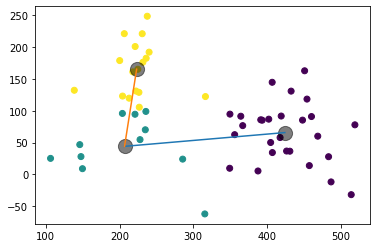

In [12]:
plt.scatter(matrix[:, 0], matrix[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#deciding edges according to the MST matrix
plt.plot(x[0], y[0])
plt.plot(x[2], y[2])

plt.show()

# Projection

In [13]:
#find the labels to identify cells in different clusters
labels = kmeans.labels_
labels

array([1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [14]:
#find the edges that connect two cluster centers
v12 = centers[0].reshape(-1,1)-centers[1].reshape(-1,1)
v23 = centers[1].reshape(-1,1)-centers[2].reshape(-1,1)

In [15]:
x1 = data.loc[labels == 0].values
proj_c1 = (x1 - x1.mean(axis = 0))@v12/(v12.T@v12)

In [16]:
x2 = data.loc[labels == 1].values

In [17]:
x3 = data.loc[labels == 2].values
proj_c3 = (x3 - x3.mean(axis = 0))@v23/(v23.T@v23)

In [18]:
#projection for cluster 2
c2_points_position = list(np.where(labels == 1)[0])
project_value_list21 = []
project_value_list23 = []
for ele in c2_points_position:
    d1 = np.linalg.norm(matrix[ele] - centers[0])
    d2 = np.linalg.norm(matrix[ele] - centers[2])
    x_c2 = matrix[ele].reshape(-1,1) - centers[1].reshape(-1,1)
    if d1 < d2:
        project_value21 = (x_c2.T@(v12))/(v12.T@v12)
        project_value_list21.append(project_value21)
    else:
        project_value23 = (x_c2.T@(v23))/(v23.T@v23)
        project_value_list23.append(project_value23)


In [19]:
#find the cell order
cell_order_c1 = np.argsort(proj_c1.reshape(1, -1))
cell_order_c1

array([[19,  2, 21,  7, 24, 20, 17, 25, 10,  1, 11, 18, 14,  5, 12,  9,
         6, 22, 13,  0, 15,  3,  4, 16,  8, 23, 26]])

In [20]:
cell_order_c21 = np.argsort(np.array(project_value_list21).reshape(1, -1))
cell_order_c2_combine21 = cell_order_c21[0]+max(cell_order_c1[0])+1
cell_order_c2_combine21

array([28, 27])

In [21]:
cell_order_c23 = np.argsort(np.array(project_value_list23).reshape(1, -1))
cell_order_c2_combine23 = cell_order_c23[0]+max(cell_order_c2_combine21)+1
cell_order_c2_combine23

array([35, 34, 37, 33, 36, 29, 30, 31, 32])

In [22]:
cell_order_c3 = np.argsort(proj_c3.reshape(1, -1))
cell_order_c3_combine = cell_order_c3[0]+max(cell_order_c2_combine23)+1
cell_order_c3_combine

array([43, 42, 48, 41, 40, 50, 47, 44, 45, 49, 54, 39, 52, 38, 53, 46, 51])

In [23]:
pt_x = np.hstack(( cell_order_c1[0],cell_order_c2_combine21,cell_order_c2_combine23,cell_order_c3_combine )).ravel()
pt_y = np.concatenate((x1,x2,x3), axis = 0)

In [24]:
matrix_ordered = np.concatenate((pt_x.reshape(-1,1), pt_y), axis = 1)

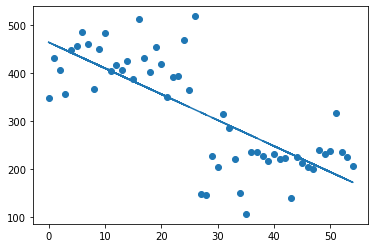

In [25]:
#plot the pseudotime by x
plt.scatter(matrix_ordered[:,0], matrix_ordered[:,1])
mx,bx = np.polyfit(matrix_ordered[:,0], matrix_ordered[:,1], 1)
plt.plot(matrix_ordered[:,0], mx*matrix_ordered[:,0]+bx)

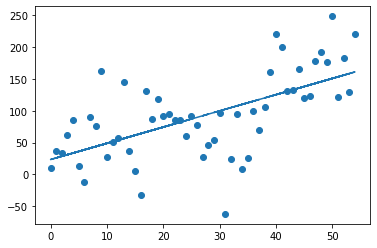

In [26]:
#plot the pseudotime by y
plt.scatter(matrix_ordered[:,0], matrix_ordered[:,2])
my,by = np.polyfit(matrix_ordered[:,0], matrix_ordered[:,2], 1)
plt.plot(matrix_ordered[:,0], my*matrix_ordered[:,0]+by)

In [27]:
vector12 = centers[0]-centers[1]
vector23 = centers[1]-centers[2]

In [28]:
m1 = proj_c1*vector12+centers[0]
m21 = np.array(project_value_list21)*vector12+centers[1]
m23 = np.array(project_value_list23)*vector23+centers[1]
m3 = proj_c3*vector23+centers[2]

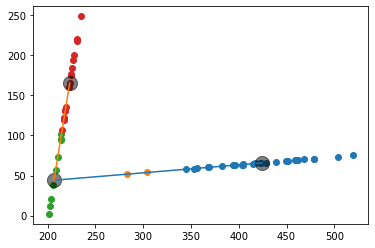

In [29]:
plt.scatter(m1[:,0], m1[:,1])
plt.scatter(m21[:,:,0], m21[:,:,1])
plt.scatter(m23[:,:,0], m23[:,:,1])
plt.scatter(m3[:,0], m3[:,1])


centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.plot(x[0], y[0])
plt.plot(x[2], y[2])

plt.show()


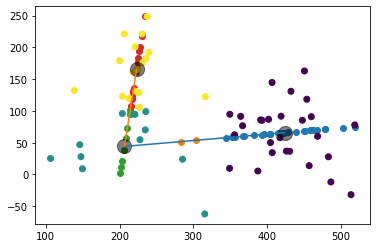

In [30]:
plt.scatter(m1[:,0], m1[:,1])
plt.scatter(m21[:,:,0], m21[:,:,1])
plt.scatter(m23[:,:,0], m23[:,:,1])
plt.scatter(m3[:,0], m3[:,1])

plt.scatter(matrix[:, 0], matrix[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.plot(x[0], y[0])
plt.plot(x[2], y[2])

plt.show()

